In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
import pandas as pd
import yfinance as yf

In [4]:
lam = 2
k_values = np.arange(0,9)
probabilities = poisson.pmf(k_values, lam)

probabilities_percentage = np.round(probabilities * 100, 2)

In [5]:
poisson_table = pd.DataFrame({'k': k_values, 'Probability (%)': probabilities_percentage})
print(poisson_table)

   k  Probability (%)
0  0            13.53
1  1            27.07
2  2            27.07
3  3            18.04
4  4             9.02
5  5             3.61
6  6             1.20
7  7             0.34
8  8             0.09


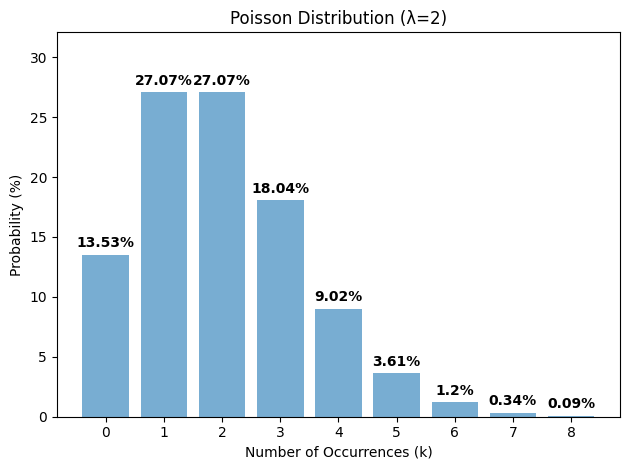

In [6]:
fig, ax = plt.subplots()
bars = ax.bar(k_values, probabilities_percentage, tick_label = k_values, alpha = 0.6)
ax.set_xlabel('Number of Occurrences (k)')
ax.set_ylabel('Probability (%)')
ax.set_title('Poisson Distribution (λ=2)')
ax.bar_label(bars, 
             labels=[f'{prob}%' for prob in probabilities_percentage],
             padding = 3, fontsize = 10, fontweight='bold'
            )
ax.set_ylim(0, probabilities_percentage.max() + 5)
plt.tight_layout()
plt.show()

In [7]:
cumulative_probabilities = poisson.cdf(k_values, lam)
cumulative_percentage = np.round(cumulative_probabilities * 100, 2)

poisson_table = pd.DataFrame({'k': k_values,
                              'Probability (%)': probabilities_percentage,
                              'Cumulative Probability (%)': cumulative_percentage
                             }
                            )
print(poisson_table)

   k  Probability (%)  Cumulative Probability (%)
0  0            13.53                       13.53
1  1            27.07                       40.60
2  2            27.07                       67.67
3  3            18.04                       85.71
4  4             9.02                       94.73
5  5             3.61                       98.34
6  6             1.20                       99.55
7  7             0.34                       99.89
8  8             0.09                       99.98


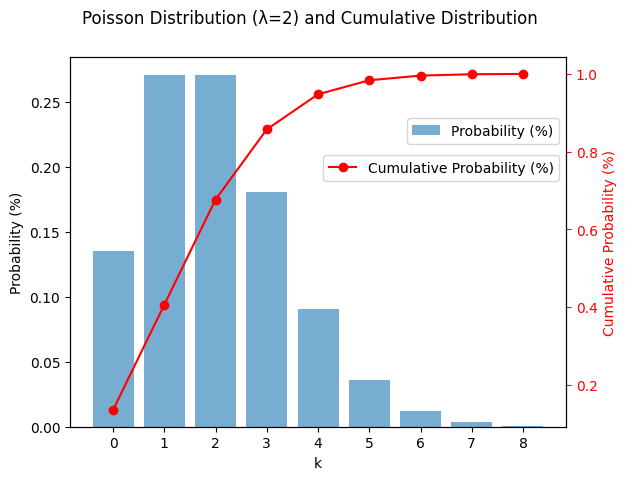

In [8]:
fig, ax1 = plt.subplots()
ax1.bar(k_values, probabilities,
        alpha = 0.6,
        label = 'Probability (%)')
ax1.set_xlabel('k')
ax1.set_ylabel('Probability (%)')
ax1.tick_params('y')
ax1.set_xticks(k_values)
ax1.set_xticklabels([str(k) for k in k_values])

ax2 = ax1.twinx()
ax2.plot(k_values, cumulative_probabilities,
         color = 'r', marker = 'o',
         label ='Cumulative Probability (%)')
ax2.set_ylabel('Cumulative Probability (%)', color = 'r')
ax2.tick_params('y', colors = 'r')

fig.suptitle('Poisson Distribution (λ=2) and Cumulative Distribution')
ax1.legend(loc = 'center right', bbox_to_anchor = (1.00, 0.8))
ax2.legend(loc = 'center right', bbox_to_anchor = (1.00, 0.7))

plt.show()

In [10]:
random_digits = [f'{i:02}' for i in range(0, 100)]
random_digits_ranges = []
current_index = 0
total_digits = len(random_digits)

for i, row in poisson_table.iterrows():
    count = max(1, int(row['Probability (%)']))
    end_index = (current_index + count - 1) % total_digits
    if current_index <= end_index:
        start = random_digits[current_index]
        end = random_digits[end_index]
        random_digits_ranges.append(f"{start}-{end}")
    else:
        start = random_digits[current_index]
        end = random_digits[end_index]
        random_digits_ranges.append(f"{start}-99, 00-{end}")
    current_index = (end_index + 1) % total_digits

poisson_table['Random Digits'] = random_digits_ranges
print(poisson_table)

   k  Probability (%)  Cumulative Probability (%) Random Digits
0  0            13.53                       13.53         00-12
1  1            27.07                       40.60         13-39
2  2            27.07                       67.67         40-66
3  3            18.04                       85.71         67-84
4  4             9.02                       94.73         85-93
5  5             3.61                       98.34         94-96
6  6             1.20                       99.55         97-97
7  7             0.34                       99.89         98-98
8  8             0.09                       99.98         99-99


In [11]:
np.random.seed(1)
random_digits = np.random.choice(100, 10, replace=False)
formatted_digits = [f'{digit:02}' for digit in random_digits]
print('Random Digits:', formatted_digits)

Random Digits: ['80', '84', '33', '81', '93', '17', '36', '82', '69', '65']


In [12]:
expected_value = sum(poisson_table['k'] * poisson_table['Probability (%)'])
print(expected_value / 100)

1.9975999999999998


In [13]:
np.random.seed(1)
num_trials = 500
normalized_probabilities = probabilities / probabilities.sum()
simulated_values = np.random.choice(k_values,
                                    size = num_trials,
                                    p = normalized_probabilities)

unique, counts = np.unique(simulated_values, return_counts=True)
simulated_counts = dict(zip(unique, counts))
simulated_percentages = {k: (v / num_trials) * 100 for k, v in simulated_counts.items()}

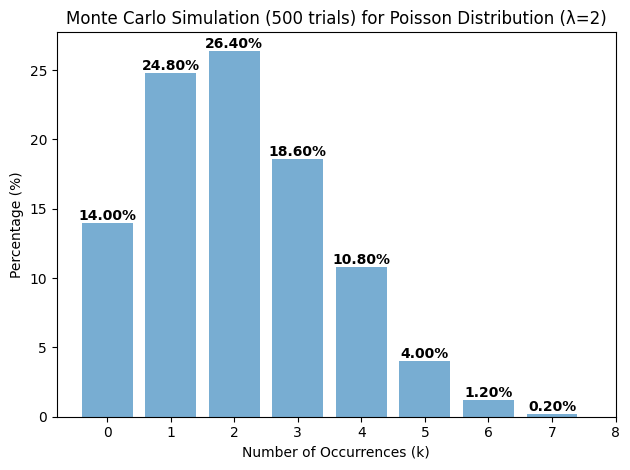

In [14]:
fig, ax = plt.subplots()
bars = ax.bar(simulated_percentages.keys(),
              simulated_percentages.values(),
              alpha=0.6)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height,
            f'{height:.2f}%', ha='center', va='bottom',
            fontsize=10, fontweight='bold')
    
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Number of Occurrences (k)')
ax.set_title('Monte Carlo Simulation (500 trials) for Poisson Distribution (λ=2)')
ax.set_xticks(k_values)
plt.tight_layout()
plt.show()

In [15]:
ticker_symbol = 'GM' 
ticker_data = yf.Ticker(ticker_symbol)
stock_data_23 = ticker_data.history(
    start='2023-07-01',
    end='2023-12-31',
    interval='1d'
)
stock_data_24 = ticker_data.history(
    start='2024-01-01',
    end='2024-01-31',
    interval='1d'
)
close_prices_23 = stock_data_23[['Close']]
close_prices_24 = stock_data_24[['Close']]

close_prices_23 = close_prices_23.reset_index(drop=True)
close_prices_24 = close_prices_24.reset_index(drop=True)

In [17]:
stats_23 = close_prices_23.describe()
print(stats_23)
stats_24 = close_prices_24.describe()
print(stats_24)

            Close
count  126.000000
mean    32.440663
std      3.599923
min     26.031229
25%     29.608687
50%     32.341236
75%     35.313013
max     39.453018
           Close
count  20.000000
mean   34.926128
std     0.797066
min    33.873581
25%    34.498057
50%    34.667030
75%    35.269464
max    37.370647


In [18]:
close_prices_23['Log Return'] = \
    np.log(close_prices_23['Close'] / close_prices_23['Close'].shift(1))
log_returns = close_prices_23['Log Return'].dropna()

C:\Users\PauloOliveira\AppData\Local\Temp\ipykernel_34132\4193060918.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(log_returns, shade = True)


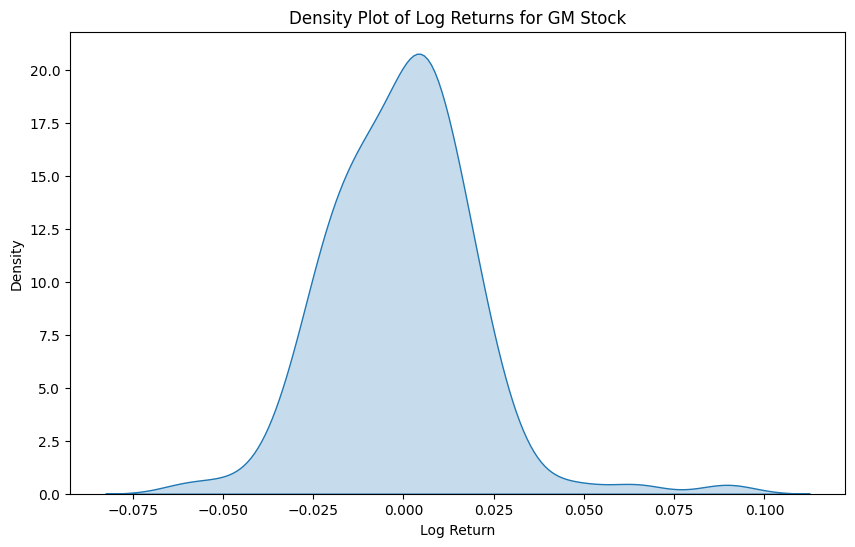

In [19]:
plt.figure(figsize = (10, 6))
sns.kdeplot(log_returns, shade = True)
plt.title('Density Plot of Log Returns for GM Stock')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.show()

In [20]:
mu = log_returns.mean()
print(mu)
sigma = log_returns.std()
print(sigma)

-0.0006055196811943205
0.020045657375126494


In [21]:
num_simulations = 500
num_days = 20
last_price_23 = close_prices_23.iloc[-1].values[0]

In [23]:
simulation_df = pd.DataFrame()

for i in range(num_simulations):
    sampled_returns = np.random.normal(mu, sigma, num_days)
    price_list = [last_price_23]
    for r in sampled_returns:
        price_list.append(price_list[-1] * np.exp(r))
    
    simulation_df[i] = price_list

C:\Users\PauloOliveira\AppData\Local\Temp\ipykernel_34132\862426101.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[i] = price_list
C:\Users\PauloOliveira\AppData\Local\Temp\ipykernel_34132\862426101.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[i] = price_list
C:\Users\PauloOliveira\AppData\Local\Temp\ipykernel_34132\862426101.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider join

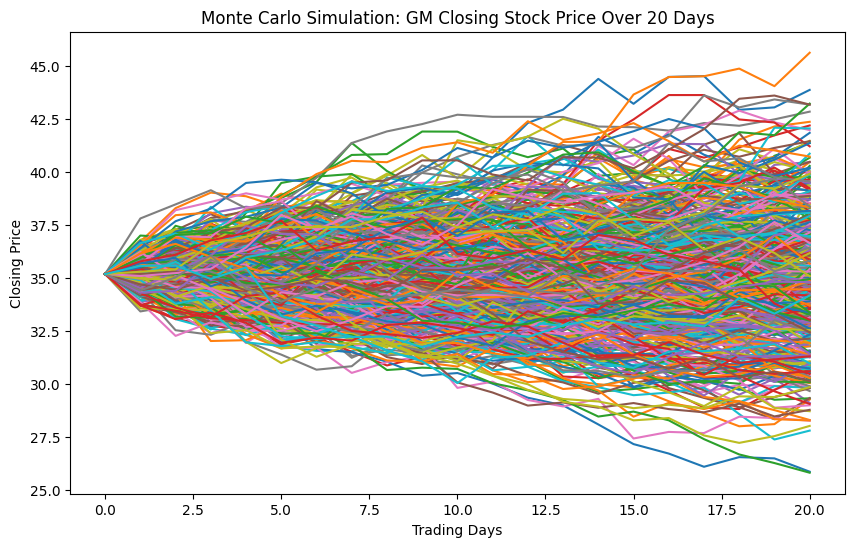

233
267
       Simulated Prices
count      10500.000000
mean          35.155105
std            2.246593
min           25.815131
25%           33.836634
50%           35.186203
75%           36.430338
max           45.623022


In [24]:
plt.figure(figsize = (10, 6))
plt.plot(simulation_df)
plt.title(f'Monte Carlo Simulation: {ticker_symbol} Closing Stock Price Over {num_days} Days')
plt.xlabel('Trading Days')
plt.ylabel('Closing Price')
plt.show()

start_price = simulation_df.iloc[0, 0]
ending_prices = simulation_df.iloc[-1, :]
num_greater = (ending_prices > start_price).sum()
num_less = (ending_prices < start_price).sum()
print(num_greater)
print(num_less)

all_simulations = simulation_df.values.flatten()
overall_stats = pd.DataFrame(all_simulations, \
                    columns = ['Simulated Prices']).describe()
print(overall_stats)